<a href="https://colab.research.google.com/github/KhanRazaIlahi/KhanRazaIlahi/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

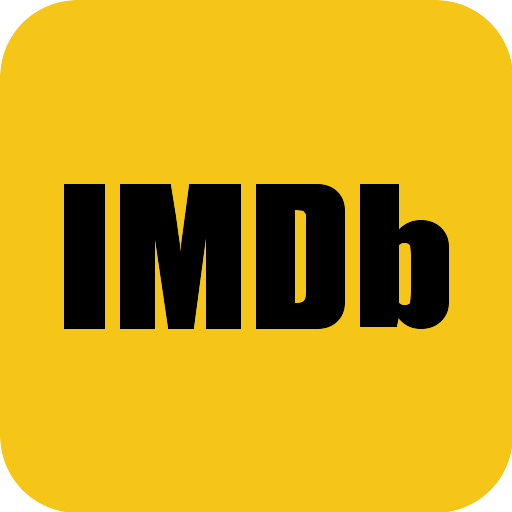

# Project Summary
The dataset "All Top Rated IMDb Movies" aims to provide comprehensive information about highly rated movies according to IMDb ratings. It includes details such as movie titles, release years, genres, IMDb ratings, runtime, and more. This dataset can be valuable for movie enthusiasts, data analysts, and machine learning practitioners interested in exploring and analyzing top-rated films.

# Background
The popularity of movies has surged in recent years, with audiences relying on platforms like IMDb to discover highly acclaimed films. Understanding the characteristics of top-rated movies can offer insights into the preferences of viewers and the factors that contribute to a film's success. This dataset is a valuable resource for conducting exploratory data analysis, building recommendation systems, and gaining a deeper understanding of the features associated with highly rated movies.

# Dataset Content:
The dataset includes information on various aspects of movies, providing a rich set of features for analysis. Key columns in the dataset include:

id          : The unique identifier for a record.

title       : The title or name of the content (e.g., movie or TV show).

overview    : A brief summary or description of the content.

popularity  : A measure of the content's popularity, often based on user
engagement or views.

release_date: The date when the content was released.

vote_average: The average rating given to the content by users.

vote_count  : The number of votes or ratings received by the content.





Data from - https://www.kaggle.com/datasets/rajkumardubey10/all-top-rated-imdb-movies-dataset


<a id="top"></a>
### Notebook Content

- <a href= "#link1">1.Data Inspection and Preprocessing</a>
- <a href= "#link2">2.Exploratory Data Analysis (EDA)</a>
- <a href= "#link3">3.Preprocessing for Machine Learning</a>
- <a href= "#link4">4.K-Means Clustering</a>
- <a href= "#link5">5.Classification Models</a>
- <a href= "#link6">6.Classification Model Evaluation</a>
- <a href= "#link7">7.Conclusion</a>

In [69]:
# Loading Libraries

import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud


# Machine-Learning Libraries
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

<a id = "link1"><h1 style="font-size: 24px;">
Data Inspection and Preprocessing</h1></a>
* Loaded and inspected the dataset containing information about top-rated movies.
* Dropped irrelevant columns and handled missing values.
* Explored descriptive statistics and correlations.
* Utilized word clouds to visualize the most common words in movie overviews.

[Go Back to the Beginning](#top)


In [70]:
# Load your dataset
df = pd.read_csv('Top_rated_movies1.csv')

In [71]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8831 non-null   int64  
 1   title         8831 non-null   object 
 2   overview      8830 non-null   object 
 3   popularity    8831 non-null   float64
 4   release_date  8831 non-null   object 
 5   vote_average  8831 non-null   float64
 6   vote_count    8831 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 483.1+ KB


In [72]:
# Display first few rows of the dataset
df.head()

,id,title,overview,popularity,release_date,vote_average,vote_count
0,168705,BloodRayne,"In 18th-century Romania, after spending much o...",17.499,2005-10-22,4.105,501
1,19766,Inspector Gadget 2,"After capturing Claw, all the criminals have g...",20.772,2003-03-11,4.100,342
2,248705,The Visitors: Bastille Day,"Stuck in the corridors of time, Godefroy de Mo...",18.828,2016-03-23,4.090,636
3,17711,The Adventures of Rocky & Bullwinkle,Rocky and Bullwinkle have been living off the ...,16.436,2000-06-30,4.075,335
4,580,Jaws: The Revenge,"After another deadly shark attack, Ellen Brody...",30.996,1987-07-17,4.064,931


In [73]:
# Drop Irrelevant Column
df = df.drop(['id'], axis = 1)
df.shape

(8831, 6)

In [74]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,8831.0,33.136177,49.108903,0.600,16.7290,23.804,35.7515,1766.305
vote_average,8831.0,6.639059,0.794924,2.106,6.1135,6.662,7.2050,8.708
vote_count,8831.0,1969.126486,3059.560533,1.000,469.0000,846.000,1966.0000,34794.000


In [75]:
# Specify variable type
numerical = ['popularity','vote_average','vote_count']
categorical = ['title','overview','release_date']

In [76]:
# Determine percent missing
df.isnull().sum()/(len(df))*100

title           0.000000
overview        0.011324
popularity      0.000000
release_date    0.000000
vote_average    0.000000
vote_count      0.000000
dtype: float64

In [77]:
# Replace missing values with mode of column vector
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [78]:
# Recheck for missing values
df.isnull().sum()

title           0
overview        0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

In [79]:
# Check Duplicates
df.duplicated().sum()

# Drop  Duplicates
# df.drop_duplicates()

0

<a id = "link2"><h1 style="font-size: 24px;">
Exploratory Data Analysis (EDA)</h1></a>
*   Useful for understanding relationships and trends in the dataset.
*   Helps in identifying patterns, correlations, and potential outliers.
*   We Have: -
  - Created visualizations to understand the relationships and distributions of key features.
  - Generated a heatmap to visualize correlations.
  - Plotted histograms for the distribution of 'vote_average' and 'vote_count'.
  - Created a line chart to show the number of content releases each year.

[Go Back to the Beginning](#top)




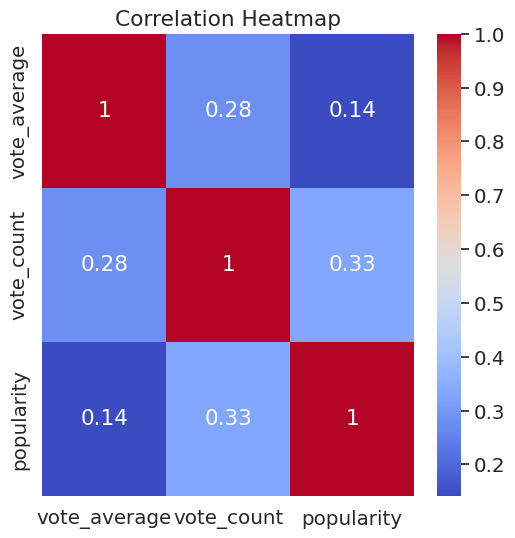

In [80]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[['vote_average', 'vote_count', 'popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

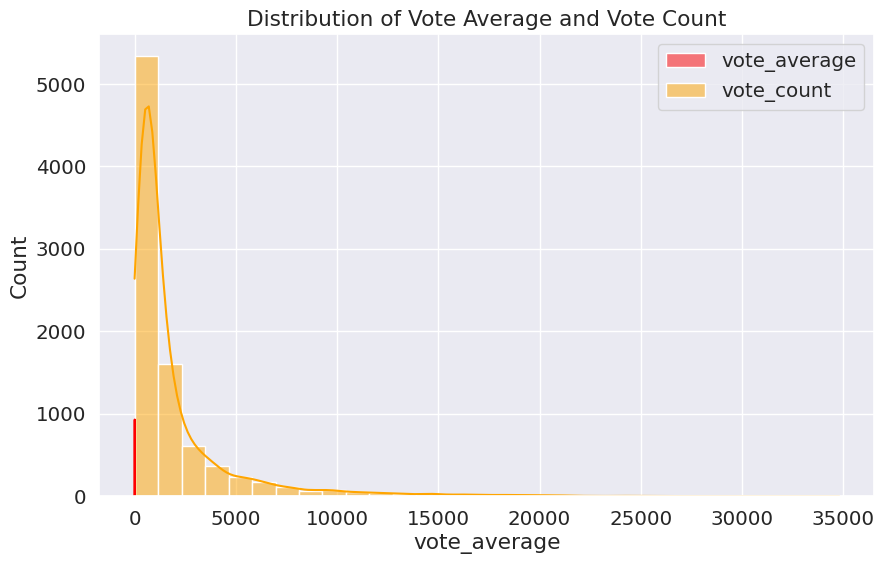

In [81]:
# Distribution of 'vote_average' and 'vote_count'
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True, color='red', label='vote_average')
sns.histplot(df['vote_count'], bins=30, kde=True, color='orange', label='vote_count')
plt.title('Distribution of Vote Average and Vote Count')
plt.legend()
plt.show()

In [82]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Create 'release_year'
df['release_year'] = df['release_date'].dt.year

yearly_counts = df.groupby('release_year').size().reset_index(name='count')

# Line chart for content released every year
fig_yearly = px.line(yearly_counts, x='release_year', y='count', title='Content Released Every Year')

fig_yearly.show()


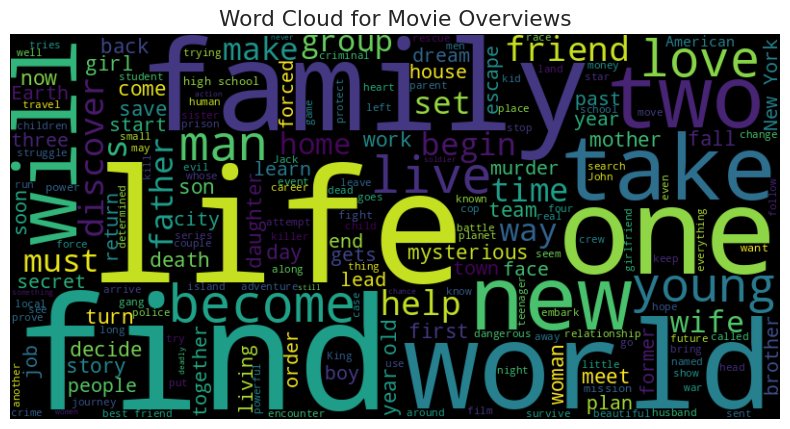

In [83]:
# Combine all overviews into a single string
text = ' '.join(df['overview'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Overviews')
plt.show()


<a id = "link3"><h1 style="font-size: 24px;">
Preprocessing for Machine Learning</h1></a>

*   Defined target variable 'binary_popularity' based on the mean popularity.
*   Split the dataset into training and testing sets.
*   Split the dataset into training and testing sets.
*   Standardized features using StandardScaler.

[Go Back to the Beginning](#top)




In [84]:
# Target variable: Binary popularity (e.g., 1 if popular, 0 if not)
df['binary_popularity'] = (df['popularity'] > df['popularity'].mean()).astype(int)

In [85]:
# Assume 'binary_popularity' is the target variable
X = df[['vote_average', 'vote_count']]
y = df['binary_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id = "link4"><h1 style="font-size: 24px;">
K-Means Clustering</h1></a>
*   Provides insights into potential natural groupings in the data.
*   Useful for segmenting data based on similarities.
*   We Have: -
   - Applied K-Means clustering to identify potential clusters based on 'vote_average' and 'vote_count'.
   - Visualized clusters using pairplots.
   
[Go Back to the Beginning](#top)


In [87]:
# Visualizing K-Means Clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['vote_average', 'vote_count']])

<Figure size 1300x1700 with 0 Axes>

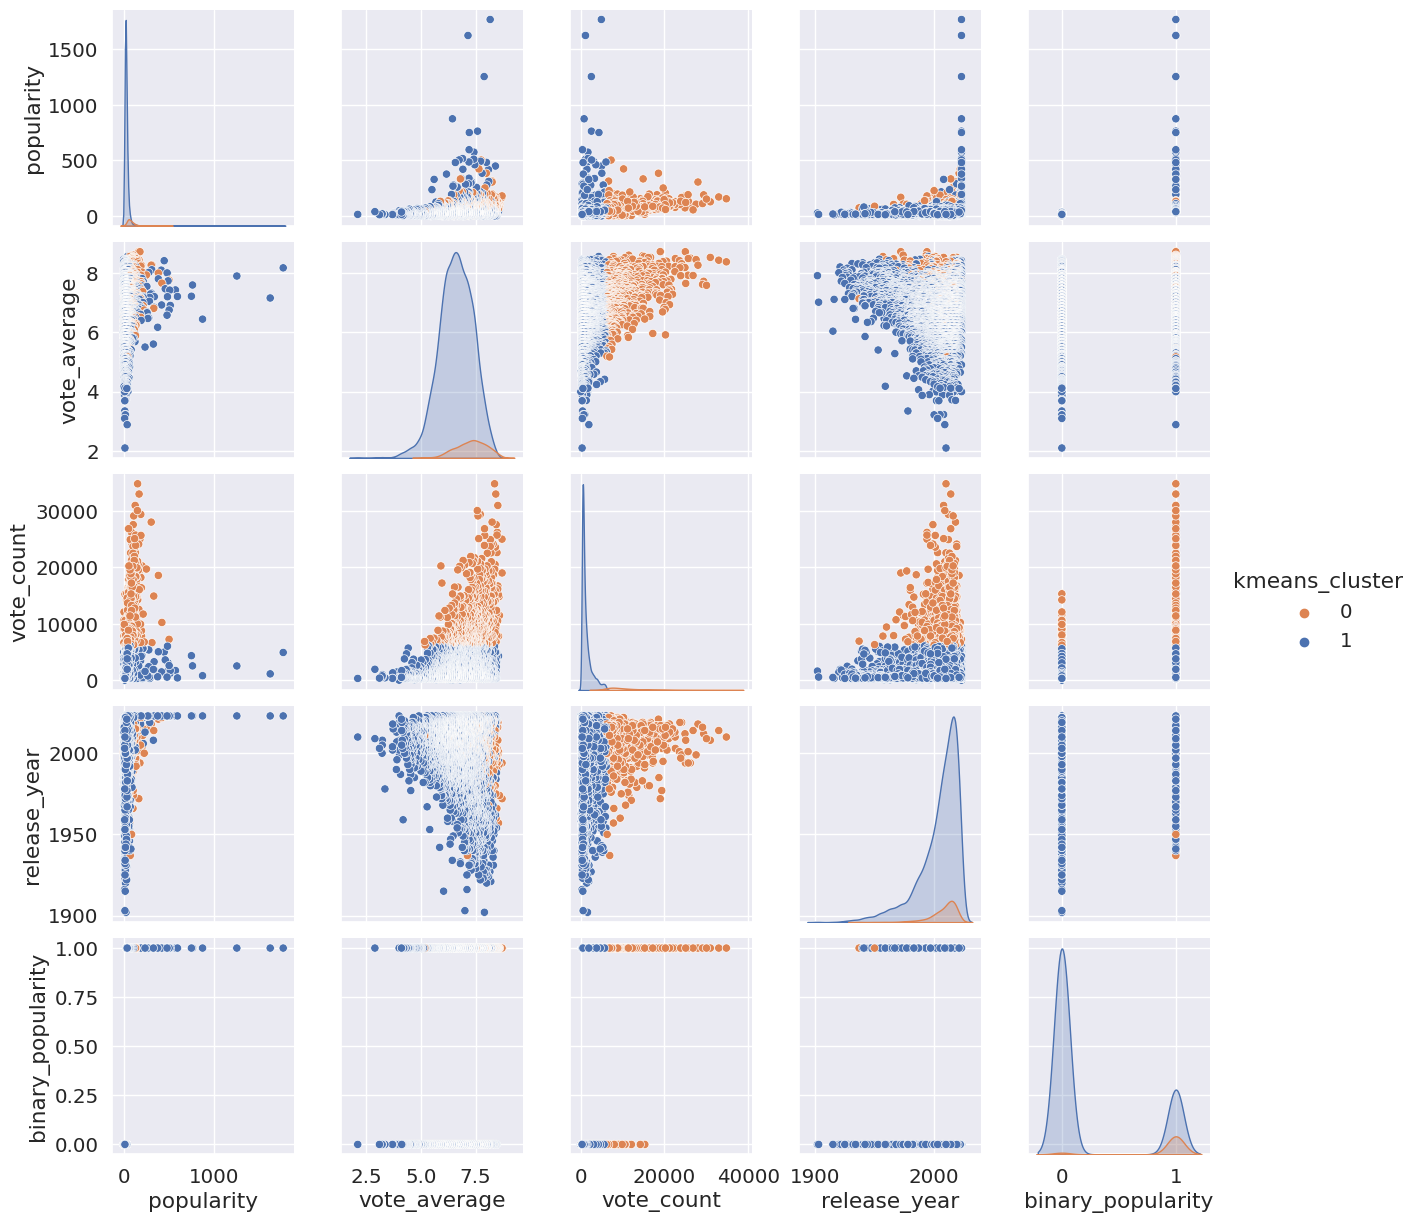

In [88]:
# Pairplot with Clusters
plt.figure(figsize=(13, 17))
cluster_palette = {label: sns.color_palette()[idx] for idx, label in enumerate(df['kmeans_cluster'].unique())}
sns.pairplot(data=df, hue='kmeans_cluster', palette=cluster_palette)
plt.show()

<a id="link5"><h1 style="font-size: 24px;">Classification Models</h1></a>
*   Decision Tree and GridSearchCV enhance model performance.
*   Useful for predicting binary popularity based on 'vote_average' and 'vote_count'.
*   Evaluation metrics (accuracy, precision, recall, AUC) help assess model effectiveness.
* We have: -
  - Trained and evaluated several classification models: Random Forest, SVM, KNN, - Logistic Regression, and Decision Tree.
  - Conducted model evaluation using confusion matrices, ROC curves, and classification reports.
  - Utilized GridSearchCV to tune hyperparameters for Decision Tree.
  - Created a bar chart to compare model metrics.

[Go Back to the Beginning](#top)


In [89]:
# Define Classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

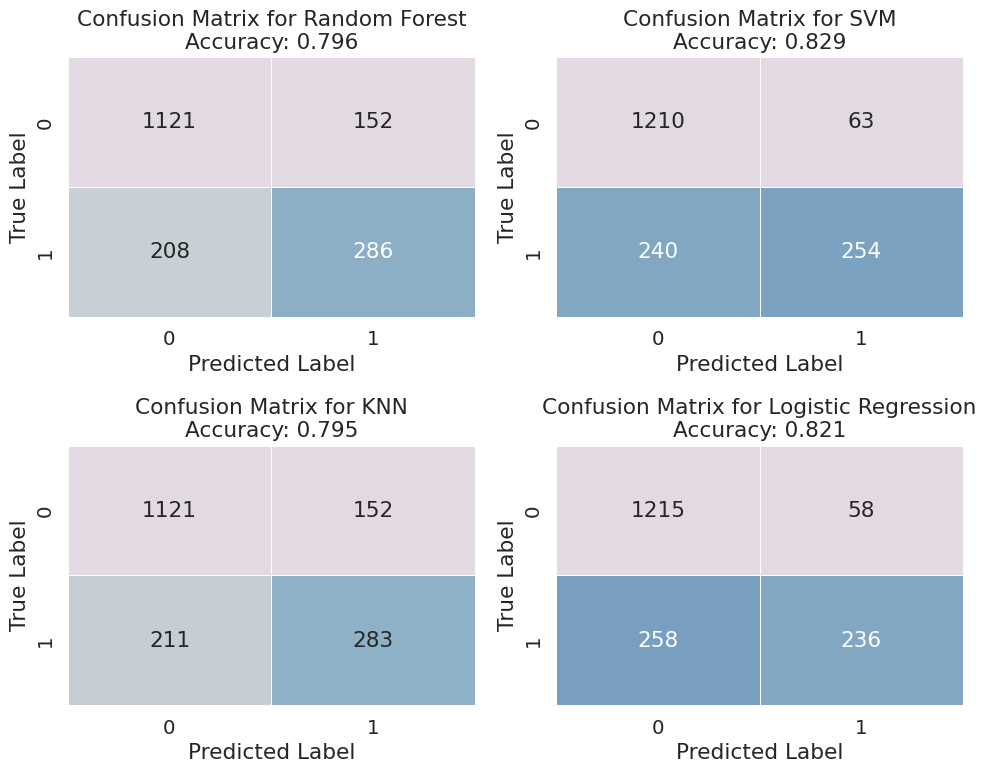

In [90]:
# Model Evaluation Metrics
plt.figure(figsize=(10, 8))

for i, (name, classifier) in enumerate(classifiers.items(), 1):
    # Training
    classifier.fit(X_train, y_train)

    # Prediction
    y_pred = classifier.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    matrix = confusion_matrix(y_test, y_pred)

    plt.subplot(2, 2, i)
    sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f'Confusion Matrix for {name}\nAccuracy: {accuracy:.3f}')

plt.tight_layout()
plt.show()


In [91]:
# Create decision tree classifier
tr = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=25)

In [92]:
# Train decision tree classifier
tr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=25)

In [93]:
# Evaluate the accuracy of the assignment
y_pred = tr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.8183361629881154


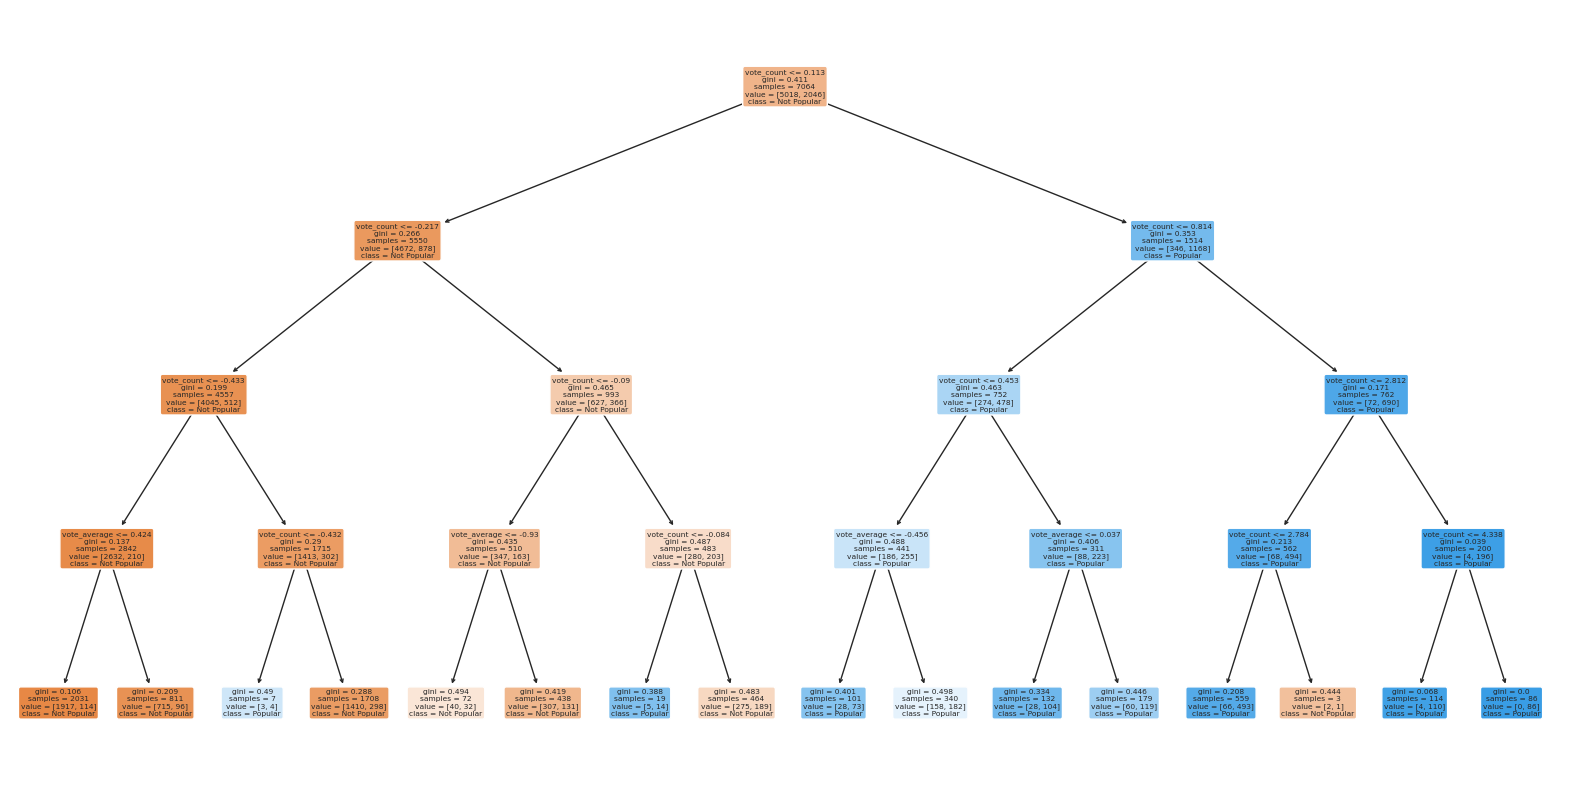

In [94]:
# Generate tree plot
plt.figure(figsize=(20, 10))
tree.plot_tree(tr, feature_names=X.columns, class_names=['Not Popular', 'Popular'], filled=True, rounded=True)
plt.show()

In [95]:
# Make predictions
tr_pred=tr.predict(X_test)
print(tr_pred)

# Cross-validation score
tr_cv = cross_val_score(tr, X_train, y_train, cv=10).mean()
print(f"Decision Tree Cross-validation Score: {tr_cv:.3f}") # Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

[0 0 0 ... 0 0 0]
Decision Tree Cross-validation Score: 0.824


In [96]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.3f' % tr.score(X_test, y_test))

# Precision
print('Precision: %.3f' % precision_score(y_test, tr_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, tr_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, tr_pred))

Accuracy: 0.818
Precision: 0.727
Recall: 0.561
F1 score: 0.633


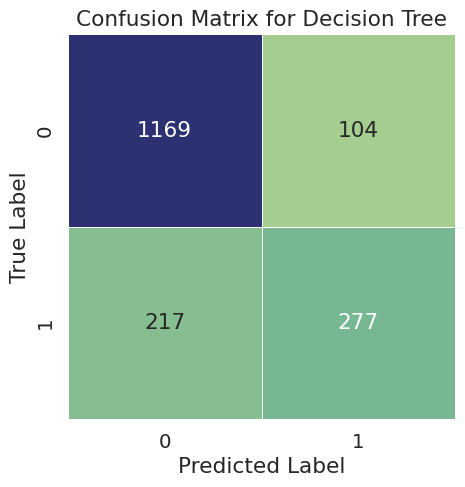

In [97]:
# Confusion Matrix for Decision Tree
tr_matrix = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(5, 5))
sns.heatmap(tr_matrix, annot=True, cbar=False, cmap='crest', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [98]:
# Predict probabilities for the test data.
tr_probs = tr.predict_proba(X_test)[:, 1]

# Keep Probabilities of the positive class only.
# tr_probs = tr_probs[:, 1]

# Compute the AUC Score.
auc_tr = roc_auc_score(y_test, tr_probs)
print('Decision Tree AUC: %.2f' % auc_tr)

Decision Tree AUC: 0.83


In [99]:
# USING GRID SEARCH TO WORK ON HYPER - PARAMETERS
parameters = {'criterion':['gini','entropy'],
              'max_depth':[_  for _ in range(1,11)]
             }

# GridSearchCV estimator.
gs_tree = GridSearchCV(tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [100]:
# Make predictions with the best parameters.
gs_tree_pred=gs_tree.predict(X_test)

In [101]:
# Best parameters.
print("Best Decision tree Parameters: {}".format(gs_tree.best_params_))

# Cross validation accuracy for the best parameters.
print('Cross-validation accuracy: %0.3f' % gs_tree.best_score_)

# Accuracy: 1 is perfect prediction.
print('Accuracy: %0.3f' % (gs_tree.score(X_test,y_test)))

# Precision
print('Precision: %.3f' % precision_score(y_test, gs_tree_pred))

# Recall
print('Recall: %.3f' % recall_score(y_test, gs_tree_pred))

# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.3f' % f1_score(y_test, gs_tree_pred))

Best Decision tree Parameters: {'criterion': 'gini', 'max_depth': 1}
Cross-validation accuracy: 0.826
Accuracy: 0.818
Precision: 0.729
Recall: 0.557
F1 score: 0.631


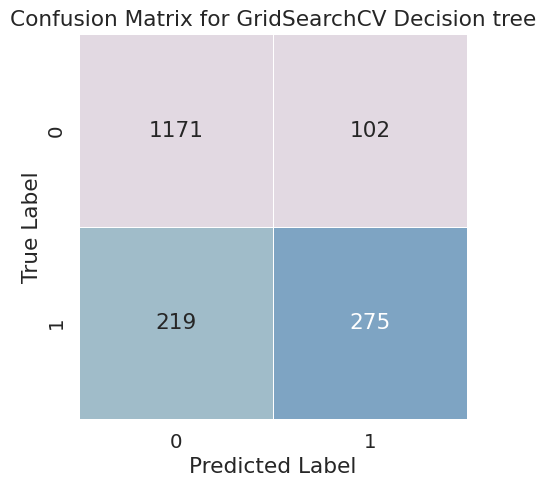

In [102]:
# Plot confusion matrix for Decision tree.
gs_tr_matrix = confusion_matrix(y_test,gs_tree_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(5,5))
sns.heatmap(gs_tr_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Decision tree');

In [103]:
# Predict probabilities for the test data.
gs_tree_probs = gs_tree.predict_proba(X_test)

# Keep Probabilities of the positive class only.
gs_tree_probs = gs_tree_probs[:, 1]

# Compute the AUC Score.
gs_tree_auc = roc_auc_score(y_test, gs_tree_probs)
print('AUC: %.2f' % gs_tree_auc)

AUC: 0.74


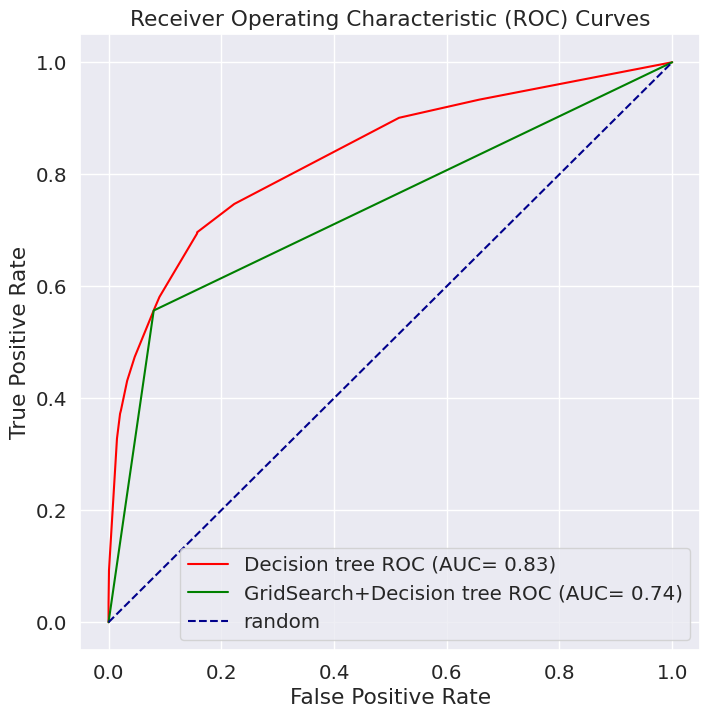

In [104]:
# Get the ROC Curves.
gs_tr_fpr, gs_tr_tpr, gs_tr_thresholds = roc_curve(y_test, gs_tree_probs)
tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_test, tr_probs)

# Plot the ROC curves.
plt.figure(figsize=(8,8))
plt.plot(tr_fpr, tr_tpr, color='red', label='Decision tree ROC (AUC= %0.2f)'% auc_tr)
plt.plot(gs_tr_fpr, gs_tr_tpr, color='green', label='GridSearch+Decision tree ROC (AUC= %0.2f)'% gs_tree_auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()

In [105]:
metrics=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

fig = go.Figure()

# Add bars for Decision Tree
fig.add_trace(go.Bar(
    name='Decision Tree',
    x=metrics,
    y=[tr.score(X_test, y_test), precision_score(y_test, tr_pred), recall_score(y_test, tr_pred), f1_score(y_test, tr_pred), auc_tr],
    text=[f"{metric}: {value:.3f}" for metric, value in zip(metrics, [tr.score(X_test, y_test), precision_score(y_test, tr_pred), recall_score(y_test, tr_pred), f1_score(y_test, tr_pred), auc_tr])],
    hoverinfo='text',
))

# Add bars for GridSearchCV + Decision Tree
fig.add_trace(go.Bar(
    name='GridSearchCV + Decision Tree',
    x=metrics,
    y=[gs_tree.score(X_test, y_test), precision_score(y_test, gs_tree_pred), recall_score(y_test, gs_tree_pred), f1_score(y_test, gs_tree_pred), gs_tree_auc],
    text=[f"{metric}: {value:.3f}" for metric, value in zip(metrics, [gs_tree.score(X_test, y_test), precision_score(y_test, gs_tree_pred), recall_score(y_test, gs_tree_pred), f1_score(y_test, gs_tree_pred), gs_tree_auc])],
    hoverinfo='text',
))

# Add bars for other classifiers (modify as per your classifier names and metrics)
for name, metrics_dict in results.items():
    fig.add_trace(go.Bar(
        name=name,
        x=metrics,
        y=[metrics_dict['Accuracy'], metrics_dict['Precision'], metrics_dict['Recall'], metrics_dict['F1 Score'], metrics_dict['AUC']],
        text=[f"{metric}: {value:.3f}" for metric, value in zip(metrics, [metrics_dict['Accuracy'], metrics_dict['Precision'], metrics_dict['Recall'], metrics_dict['F1 Score'], metrics_dict['AUC']])],
        hoverinfo='text',
    ))

fig.update_layout(title_text='Metrics for each model',
                  barmode='group', xaxis_tickangle=-45, bargroupgap=0.05)
fig.show()


In [106]:
# Decision Tree
tr_pred = tr.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tr_pred))

# GridSearchCV + Decision Tree
gs_tree_pred = gs_tree.predict(X_test)
print("GridSearchCV + Decision Tree Classification Report:")
print(classification_report(y_test, gs_tree_pred))

# Classifiers
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    results[name] = {
        'predictions': predictions,
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions),
        'AUC': roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    }

# Display classification report for each classifier
for name, metrics_dict in results.items():
    print(f"{name} Classification Report:")
    print(classification_report(y_test, metrics_dict['predictions']))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1273
           1       0.73      0.56      0.63       494

    accuracy                           0.82      1767
   macro avg       0.79      0.74      0.76      1767
weighted avg       0.81      0.82      0.81      1767

GridSearchCV + Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1273
           1       0.73      0.56      0.63       494

    accuracy                           0.82      1767
   macro avg       0.79      0.74      0.76      1767
weighted avg       0.81      0.82      0.81      1767

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1273
           1       0.64      0.58      0.61       494

    accuracy                           0.79      1767
  

<a id="link6"><h1 style="font-size: 24px;">Classification Model Evaluation</h1></a>

The classification reports provide a detailed overview of the performance of various machine learning models on predicting binary popularity for top-rated movies. Here's a summary and conclusion:

1. **Decision Tree and GridSearchCV + Decision Tree:**
   - Both models show similar performance with an accuracy of approximately 82%.
   - Precision for predicting popular movies (class 1) is 73%, while recall is 56%.
   - The models exhibit good precision and accuracy for predicting non-popular movies (class 0).
   - F1-score, a balance of precision and recall, is around 63%, indicating decent overall model performance.
   - These models are interpretable, making them suitable for understanding the decision-making process.

2. **Random Forest:**
   - The Random Forest model achieves an accuracy of 79%.
   - Precision, recall, and F1-score for predicting popular movies are lower compared to the Decision Tree.
   - The model shows better performance in predicting non-popular movies.

3. **SVM (Support Vector Machine):**
   - SVM achieves an accuracy of 83%.
   - It demonstrates a higher precision for predicting popular movies but a lower recall, leading to a trade-off.
   - F1-score is 63%, indicating a balance between precision and recall.
   - SVM tends to be more effective in correctly identifying non-popular movies.

4. **KNN (K-Nearest Neighbors):**
   - KNN model accuracy matches that of the Random Forest at 79%.
   - Similar to Random Forest, precision, recall, and F1-score for predicting popular movies are slightly lower than the Decision Tree model.

5. **Logistic Regression:**
   - Logistic Regression achieves an accuracy of 82%.
   - The precision-recall trade-off is observed, with higher precision for non-popular movies and lower recall for popular movies.
   - F1-score is around 60%, indicating a fair balance.

[Go Back to the Beginning](#top)



<a id="link7"><h1 style="font-size: 24px;">Conclusion</h1></a>
- The Decision Tree and GridSearchCV + Decision Tree models provide interpretable insights into predicting movie popularity, offering a good balance between precision and recall.
- SVM demonstrates competitive accuracy but with a focus on precision over recall.
- Random Forest and KNN models exhibit reasonable accuracy but with a slightly lower precision-recall balance.
- Logistic Regression performs well but may require further tuning to achieve a better balance between precision and recall.

**Recommendations for Future Work we Can:**

- Further we can do feature engineering and exploration to enhance model performance.
- Experiment with additional algorithms and ensemble methods for potential improvement.
- Fine-tune hyperparameters for SVM and other models to find the optimal balance.
- Evaluate the models on a broader dataset or consider incorporating additional relevant features.
- Implement a comprehensive recommendation system for top movies based on user preferences for a more practical application in the entertainment industry.

[Go Back to the Beginning](#top)
